In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import finesse
from finesse.analysis.actions import RunLocks, Noxaxis, Xaxis
from finesse import ligo
from LLOF3Sqz import make_LLO
from LLOF3Sqz_noITMY import make_LLO_noITMY

finesse.configure(plotting=True)

In [3]:
LIGO = finesse.Model()
LIGO.parse_file("./LIGO_degisn.txt")
# LIGO.Mloss.value = 3.75e-05 
LIGO.parse("""
###########################################################################
### SQZ path FTblock squeezer
sq sqz db=3 angle=0
#l sqz 0 0

s sqz_M1_OPO sqz.p1 M1_OPO.p1 0

bs M1_OPO R=0 T=1 phi=0 alpha=6

s subM1_OPO M1_OPO.p3 M1_OPO_AR.p1 L=6.35 nr=&nsilica
bs M1_OPO_AR R=0 T=1 phi=0 alpha=6
s lM1_OPO_EDGE M1_OPO_AR.p3 OPO_EDGE.p1 44m
m OPO_EDGE R=0 T=1 phi=0

# edge of OPO block
s lsqz_lens1 OPO_EDGE.p2 sqz_lens1.p1 0

lens sqz_lens1 1

s lsqz_lens1_faraday sqz_lens1.p2 msqz_faraday_a.p1 0

# 20 mm TGG faraday crystal
m msqz_faraday_a R=0 T=1 phi=0
s lsqz_faraday msqz_faraday_a.p2 msqz_faraday_b.p1 L=20m nr=1.95 
m msqz_faraday_b R=0 T=1 phi=0

s lsqz_faraday_lens2 msqz_faraday_b.p2 sqz_lens2.p1 0

lens sqz_lens2 1
s lsqz_lens2_zm1 sqz_lens2.p2 ZM1.p1 0

bs ZM1 T=0 L=0 phi=0 alpha=45
s lzm1_zm2 ZM1.p2 ZM2.p1 1.0

bs ZM2 T=0 L=0 phi=0 alpha=45
s lzm2_OFI ZM2.p2 OFI.p2 0
""")
# print(LIGO.unparse().splitlines())
LLO = make_LLO(LIGO.deepcopy()) # pass in deepcopy instead of the original because it changes the "token"
# print(LIGO.unparse().splitlines()[:3])

In [44]:
57.657 - 16.609 - 16.166 - 5.344

19.537999999999993

In [45]:
56.012 - 15.759 - 15.457- 5.344

19.451999999999998

In [32]:
print(LLO.mod1.midx, LLO.mod2.midx, LLO.L0.P)

0.13 0.139985 40.0 W


In [34]:
print(LLO.ly1.L, LLO.ly2.L, LLO.lx1.L, LLO.lx2.L,)
gouys = LLO.compute_space_gouys()
gx1 = gouys[LLO.spaces.lx1]["x"]
gx2 = gouys[LLO.spaces.lx2]["x"]
gy1 = gouys[LLO.spaces.ly1]["x"]
gy2 = gouys[LLO.spaces.ly2]["x"]
print(f"The Schnupp asymmetry (length) is {(LLO.ly1.L + LLO.ly2.L - LLO.lx1.L - LLO.lx2.L)} m.")
print(f"The Schnupp asymmetry (Gouy phase) is {gy1+gy2-gx1-gx2} degrees.")

5.0119775952958046 m 0.0 m 4.9946225583947905 m 0.0 m
The Schnupp asymmetry (length) is 0.01735503690101403 m.
The Schnupp asymmetry (Gouy phase) is 0.0003548471189719696 degrees.


In [40]:
(LLO.ly1.L + LLO.ly2.L + LLO.lx1.L + LLO.lx2.L)/2

5.0033000768452975

In [43]:
LLO.ly1.L + LLO.ly2.L - LLO.lx1.L - LLO.lx2.L

0.01735503690101403

In [53]:
kat1 = LLO.deepcopy()
kat1.L0.P = 40 # no squeezing
kat1.DARM.DC = 0.0034157365226926634

kat1.parse("""
pd Pin PRMAR.p1.i
pd PRefl PRMAR.p1.o


ad PoPC PR2.p3.o f=0
ad PoP9P PR2.p3.o f=&f1
ad PoP9M PR2.p3.o f=-&f1
ad PoP45P PR2.p3.o f=&f2
ad PoP45M PR2.p3.o f=-&f2


ad ReflC PRMAR.p1.o f=0
ad Refl9P PRMAR.p1.o f=&f1
ad Refl9M PRMAR.p1.o f=-&f1
ad Refl45P PRMAR.p1.o f=&f2
ad Refl45M PRMAR.p1.o f=-&f2

ad ASC SRMAR.p2.o f=0
ad AS9P SRMAR.p2.o f=&f1
ad AS9M SRMAR.p2.o f=-&f1
ad AS45P SRMAR.p2.o f=&f2
ad AS45M SRMAR.p2.o f=-&f2
""")

outLLO1 = kat1.run(Noxaxis(pre_step=RunLocks(method='newton', 
                                            display_progress=True,
                                            max_iterations=1000)))

print()
print("##################### The results: #####################")
print(f"The input power is {outLLO1['Pin']} W")
print(f"The Refl port power is {outLLO1['PRefl']} W")

print()

print(f"The power in the carrier at PoP is {np.abs(outLLO1['PoPC'])**2} W")
print(f"The power in the 9MHz upper at PoP is {np.abs(outLLO1['PoP9P'])**2} W")
print(f"The power in the 9MHz lower at PoP is {np.abs(outLLO1['PoP9M'])**2} W")
print(f"The power in the 45MHz upper at PoP is {np.abs(outLLO1['PoP45P'])**2} W")
print(f"The power in the 45MHz lower at PoP is {np.abs(outLLO1['PoP45M'])**2} W")
print()

print(f"The power in the carrier at Refl is {np.abs(outLLO1['ReflC'])**2} W")
print(f"The power in the 9MHz upper at Refl is {np.abs(outLLO1['Refl9P'])**2} W")
print(f"The power in the 9MHz lower at Refl is {np.abs(outLLO1['Refl9M'])**2} W")
print(f"The power in the 45MHz upper at Refl is {np.abs(outLLO1['Refl45P'])**2} W")
print(f"The power in the 45MHz lower at Refl is {np.abs(outLLO1['Refl45M'])**2} W")
print()

print(f"The power in the carrier at AS is {np.abs(outLLO1['ASC'])**2} W")
print(f"The power in the 9MHz upper at AS is {np.abs(outLLO1['AS9P'])**2} W")
print(f"The power in the 9MHz lower at AS is {np.abs(outLLO1['AS9M'])**2} W")
print(f"The power in the 45MHz upper at AS is {np.abs(outLLO1['AS45P'])**2} W")
print(f"The power in the 45MHz lower at AS is {np.abs(outLLO1['AS45M'])**2} W")

Error Signal Residuals at Each Iteration (W):
                          CARM_lock      MICH_lock      PRCL_lock      SRCL_lock    DARM_dc_lock  
                          REFL9_I1       POP45_Q1        POP9_I1       POP45_I1        AS_DC1     
Iteration Number    0      3.36e-05       2.46e-07       5.19e-07       2.00e-07       1.55e-01   
Iteration Number    1     -1.09e-07      -4.05e-10      -1.61e-09      -5.80e-10       3.40e-02   
Iteration Number    2     -2.27e-08      -9.02e-11      -3.33e-10      -1.20e-10       1.67e-02   
Iteration Number    3     -1.11e-08      -4.44e-11      -1.63e-10      -5.87e-11       9.41e-03   
Iteration Number    4     -6.25e-09      -2.51e-11      -9.17e-11      -3.29e-11       5.65e-03   
Iteration Number    5     -3.75e-09      -1.51e-11      -5.50e-11      -1.98e-11       3.52e-03   
Iteration Number    6     -2.33e-09      -9.40e-12      -3.42e-11      -1.23e-11       2.24e-03   
Iteration Number    7     -1.48e-09      -5.98e-12      -2.18e-

## Power recyling gain: the ratio of stored laser power in the power-recycling cavity to input laser power


$$\mathrm{PRG = \frac{P_{circ\, in\, PRC}}{P_{in}}}$$

In [46]:
kat2 = LLO.deepcopy()
kat2.L0.P = 35 # no squeezing
kat2.DARM.DC = 0.0034157365226926634
kat2.parse("""
pd Pin PRMAR.p1.i
pd Pcirc PRM.p2.o
#pd Pcirc PR2.p2.o


""")

outLLO2 = kat2.run(Noxaxis(pre_step=RunLocks(method='newton', 
                                            display_progress=True,
                                            max_iterations=1000)))
print()
print("##################### The results: #####################")

print(f"The input power is {outLLO2['Pin']} W")
print(f"The PRC circulating power is {outLLO2['Pcirc']} W")
print(f"Their ratio (PRG) is {outLLO2['Pcirc']/outLLO2['Pin']} W")

Error Signal Residuals at Each Iteration (W):
                          CARM_lock      MICH_lock      PRCL_lock      SRCL_lock    DARM_dc_lock  
                          REFL9_I1       POP45_Q1        POP9_I1       POP45_I1        AS_DC1     
Iteration Number    0      2.94e-05       2.15e-07       4.54e-07       1.75e-07       1.33e-01   
Iteration Number    1     -9.35e-08      -3.44e-10      -1.37e-09      -5.00e-10       2.87e-02   
Iteration Number    2     -1.91e-08      -7.51e-11      -2.79e-10      -1.02e-10       1.38e-02   
Iteration Number    3     -9.16e-09      -3.62e-11      -1.34e-10      -4.87e-11       7.58e-03   
Iteration Number    4     -5.03e-09      -2.00e-11      -7.33e-11      -2.67e-11       4.44e-03   
Iteration Number    5     -2.94e-09      -1.17e-11      -4.29e-11      -1.56e-11       2.69e-03   
Iteration Number    6     -1.78e-09      -7.09e-12      -2.59e-11      -9.44e-12       1.66e-03   
Iteration Number    7     -1.10e-09      -4.38e-12      -1.60e-

## Loss in arms.

    Question: How do you define the loss in the arms. It must be related to the losses in the arm cavity mirrors. The Input power subtracted by the reflected power and the transmitted power

In [62]:
print(f"{LLO.ITMXAR.L.value:.7f}", LLO.ITMX.L.value, LLO.ETMX.L.value, LLO.ETMXAR.L.value)
print(f"{LLO.ITMXAR.L.value + LLO.ITMX.L.value + LLO.ETMX.L.value + LLO.ETMXAR.L.value:.7f}")

print(LLO.ITMYAR.L.value, LLO.ITMY.L.value, LLO.ETMY.L.value, LLO.ETMYAR.L.value)
print(f"{LLO.ITMYAR.L.value + LLO.ITMY.L.value + LLO.ETMY.L.value + LLO.ETMYAR.L.value:.7f}")

0.0001645 2.6e-05 4e-05 1.4e-05
0.0002445
0.0002506 2.65e-05 4e-05 1.6e-06
0.0003187


In [24]:
(1-(1-LLO.ITMX.L.value)*(1- LLO.ETMX.L.value))*1e6

65.99896000003547

In [63]:
kat3 = LLO.deepcopy()
kat3.parse("""
# The Y arm
pd PInY BS.p2.o
pd PReflY BS.p2.i
pd PTransY ETMYAR.p2.o

# The X arm
pd PInX BSAR1.p3.o
pd PReflX BSAR1.p3.i
pd PTransX ETMXAR.p2.o
""")
# offset = 1e-6
# kat3.ITMY.T = 0.0148 - offset
# kat3.ITMY.L = 26.5e-6 + offset
outLLO3 = kat3.run(Noxaxis(pre_step=RunLocks(method='newton', 
                                            display_progress=True,
                                            max_iterations=1000)))

print()
print("##################### The results: #####################")

print(f"The input power in the Y arm is {outLLO3['PInY']} W")
print(f"The reflected power in the Y arm is {outLLO3['PReflY']} W")
print(f"The transmitted power in the Y arm is {outLLO3['PTransY']} W")
print(f"The power loss in the Y arm is {outLLO3['PInY'] - outLLO3['PReflY'] - outLLO3['PTransY']} W")

print()
print(f"The input power in the X arm is {outLLO3['PInX']} W")
print(f"The reflected power in the X arm is {outLLO3['PReflX']} W")
print(f"The transmitted power in the X arm is {outLLO3['PTransX']} W")
print(f"The power loss in the X arm is {outLLO3['PInX'] - outLLO3['PReflX'] - outLLO3['PTransX']} W")

Error Signal Residuals at Each Iteration (W):
                          CARM_lock      MICH_lock      PRCL_lock      SRCL_lock    DARM_dc_lock  
                          REFL9_I1       POP45_Q1        POP9_I1       POP45_I1        AS_DC1     
Iteration Number    0      1.02e-05       7.46e-08       1.58e-07       6.10e-08      -3.90e-03   
Iteration Number    1      3.77e-10       5.66e-12       3.56e-12       2.64e-12       2.36e-04   
Iteration Number    2     -2.33e-11      -3.52e-13      -2.19e-13      -1.76e-13      -2.77e-05   
Iteration Number    3      2.73e-12       4.12e-14       2.55e-14       2.05e-14       3.16e-06   
Iteration Number    4     -3.18e-13      -4.83e-15      -3.30e-15      -2.20e-15      -3.62e-07   

##################### The results: #####################
The input power in the Y arm is 953.8972473384254 W
The reflected power in the Y arm is 935.6722586098729 W
The transmitted power in the Y arm is 0.9650205487379347 W
The power loss in the Y arm is 17.25

## Power recycling gain is dependent on the <font color="red">loss in the arms</font> and the mode matching conditions

In [25]:
LLO.ITMY.R.value, LLO.ITMY.T.value, LLO.ITMY.L.value

(0.9851734999999999, 0.0148, 2.65e-05)

In [26]:
LLO.ITMX.R.value, LLO.ITMX.T.value, LLO.ITMX.L.value

(0.985174, 0.0148, 2.6e-05)

In [38]:
import warnings
warnings.filterwarnings('ignore')

from IPython.utils import io

In [64]:
with io.capture_output() as captured: 
    # capture stdout and stderr for only those lines

    kat4 = finesse.Model()
    # remove the ITMY in the original kat script to redefine its T and L for scanning
    parseString = """
    variable loss 1e-6
    m ITMY R=0.9851735 T=0.0148-&loss L=2.65e-05+&loss Rc=[-1940.7, -1940.7]

    # The Y arm
    pd PInY BS.p2.o
    pd PReflY BS.p2.i
    pd PTransY ETMYAR.p2.o

    # The X arm
    pd PInX BSAR1.p3.o
    pd PReflX BSAR1.p3.i
    pd PTransX ETMXAR.p2.o

    # For PRG
    pd Pin PRMAR.p1.i
    pd Pcirc PRM.p2.o
    """

    kat4.parse(
        "\n".join(
            [l.replace("[=", "[") for l in LIGO.deepcopy().unparse().splitlines() if "m ITMY R=" not in l]
        ) + parseString
    )
    
    kat4 = make_LLO_noITMY(kat4)


    outLLO4 = kat4.run(Xaxis(kat4.loss.value, "lin", -10e-6, 10e-6, 400, pre_step=RunLocks(method='newton', 
                                                                            display_progress=False,
                                                                            max_iterations=1000)))

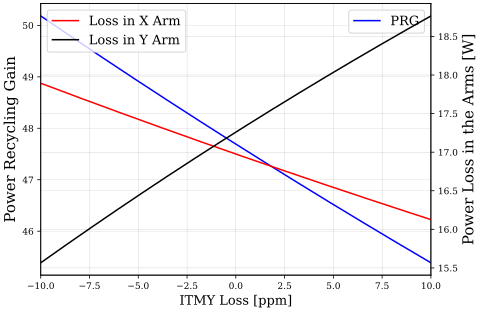

In [74]:
PRG = outLLO4["Pcirc"]/outLLO4["Pin"]
LossXArm = outLLO4['PInX'] - outLLO4['PReflX'] - outLLO4['PTransX']
LossYArm = outLLO4['PInY'] - outLLO4['PReflY'] - outLLO4['PTransY']
xaxis = np.linspace(-10e-6, 10e-6, 401)*1e6

fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(xaxis, PRG, color="b", label="PRG")

ax.set_ylabel("Power Recycling Gain", fontsize=15)
ax.set_xlabel("ITMY Loss [ppm]", fontsize=13)


ax_2 = ax.twinx()
ax_2.plot(xaxis, LossXArm, color="r", label="Loss in X Arm")
ax_2.plot(xaxis, LossYArm, color="k", label="Loss in Y Arm")
ax_2.set_ylabel("Power Loss in the Arms [W]", fontsize=15)

ax.legend(loc = 'best', fontsize=13)
ax_2.legend(loc = 'best', fontsize=13);

## Measurement for wen

In [11]:
LLO.SRM.T, LLO.SRM.L, LLO.SRM.R,

(<SRM.T=0.324 @ 0x1600c1400>,
 <SRM.L=7.3999999999999995e-06 @ 0x1600c1340>,
 <SRM.R=0.6759925999999999 @ 0x1600c14c0>)

In [12]:
LLO.PRM.T, LLO.PRM.L, LLO.PRM.R,

(<PRM.T=0.03123 @ 0x15ffb6280>,
 <PRM.L=5.9e-06 @ 0x15ffb61c0>,
 <PRM.R=0.9687641 @ 0x15ffb6340>)

In [43]:
LIGO_wen = finesse.Model()
LIGO_wen.parse_file("./LIGO_degisn.txt")

LIGO_wen.parse("""
###########################################################################
### SQZ path FTblock squeezer
sq sqz db=3 angle=0
#l sqz 0 0

s sqz_M1_OPO sqz.p1 M1_OPO.p1 0

bs M1_OPO R=0 T=1 phi=0 alpha=6

s subM1_OPO M1_OPO.p3 M1_OPO_AR.p1 L=6.35 nr=&nsilica
bs M1_OPO_AR R=0 T=1 phi=0 alpha=6
s lM1_OPO_EDGE M1_OPO_AR.p3 OPO_EDGE.p1 44m
m OPO_EDGE R=0 T=1 phi=0

# edge of OPO block
s lsqz_lens1 OPO_EDGE.p2 sqz_lens1.p1 0

lens sqz_lens1 1

s lsqz_lens1_faraday sqz_lens1.p2 msqz_faraday_a.p1 0

# 20 mm TGG faraday crystal
m msqz_faraday_a R=0 T=1 phi=0
s lsqz_faraday msqz_faraday_a.p2 msqz_faraday_b.p1 L=20m nr=1.95 
m msqz_faraday_b R=0 T=1 phi=0

s lsqz_faraday_lens2 msqz_faraday_b.p2 sqz_lens2.p1 0

lens sqz_lens2 1
s lsqz_lens2_zm1 sqz_lens2.p2 ZM1.p1 0

bs ZM1 T=0 L=0 phi=0 alpha=45
s lzm1_zm2 ZM1.p2 ZM2.p1 1.0

bs ZM2 T=0 L=0 phi=0 alpha=45
s lzm2_OFI ZM2.p2 OFI.p2 0
""")

LLO_wen = make_LLO(LIGO_wen.deepcopy()) 
LLO_wen.sqz.db = 0 # no squeezing
LLO_wen.DARM.DC = 0.0033834586466165405/2
# LLO_wen.DARM.DC = 0
LLO_wen.mod1.midx = 1e-9
LLO_wen.mod2.midx = 1e-9


offset = 1.45e-5
LLO_wen.ETMY.T = 3.9e-06
LLO_wen.ETMY.L = 4e-05 + offset
LLO_wen.ETMY.R = 0.9999561 - offset

offset = 1.46e-5
LLO_wen.ETMX.T = 3.9e-06
LLO_wen.ETMX.L = 4e-05 + offset
LLO_wen.ETMX.R = 0.9999561 - offset

offset = 4.686e-4
LLO_wen.PRM.T = 0.03123
LLO_wen.PRM.L = 5.9e-06 + offset
LLO_wen.PRM.R = 0.9687641 - offset


offset = 4.674e-4
LLO_wen.SRM.T = 0.324
LLO_wen.SRM.L = 7.4e-06 + offset
LLO_wen.SRM.R = 0.676 - offset


LLO_wen.parse("""
ad ASC SRMAR.p2.o f=0
""")

# out_wen = LLO_wen.run(Noxaxis(pre_step=RunLocks(method='newton', 
#                                             display_progress=False,
#                                             max_iterations=1000)))

out_wen = LLO_wen.run(Noxaxis())

print(out_wen["Px"], out_wen["Py"], )
print(f"The power in the carrier at AS is {np.abs(out_wen['ASC'])**2} W")

214357.69003537175 214355.65411778277
The power in the carrier at AS is 0.03910195172534871 W


In [41]:
print((1-(1-LLO_wen.SRM.L.value)*(1- LLO_wen.SR2.L.value)*(1- LLO_wen.SR3.L.value))*1e6)
print((1-(1-LLO_wen.PRM.L.value)*(1- LLO_wen.PR2.L.value)*(1- LLO_wen.PR3.L.value))*1e6)

499.9879185854095
500.0877066695386


In [44]:
print((1-(1-LLO_wen.ITMY.L.value)*(1- LLO_wen.ETMY.L.value))*1e6)
print((1-(1-LLO_wen.ITMX.L.value)*(1- LLO_wen.ETMX.L.value))*1e6) 

80.99855574994486
80.59858039999312


In [11]:
#Plotting styles
#plt.style.use('ggplot')
#@mpl.rc_context({'lines.linewidth': 1, 'lines.linestyle': '--'})
def make_plot(xData, yData, xLabel, yLabel, logx=False, logy=False, savefig=False):
    colors = ['b', 'r', 'k', 'orange', 'g', 'c', 'm', 'y']
    ydata, legends = yData
    fig, ax = plt.subplots(1, 1, figsize=(6,4))
    
    for idx, line in enumerate(ydata):
        if logx and logy:
            ax.loglog(xData, line, color=colors[idx], label=legends[idx])
        elif logx:
            ax.semilogx(xData, line, color=colors[idx], label=legends[idx])
        elif logy:
            ax.semilogy(xData, line, color=colors[idx], label=legends[idx])
        else:
            ax.plot(xData, line, color=colors[idx], label=legends[idx])

    ax.set_ylabel(yLabel, fontsize=13)
    ax.set_xlabel(xLabel, fontsize=13)

    ax.legend(loc = 'best', fontsize=13)
            
    if savefig:
        fig.savefig(f'./{lengeds[idx]}.pdf')
        
xData = np.linspace(0, 10, 1000)
yData1 = xData**2 + np.random.normal(0, 1, 1000)
yData2 = xData**2 + xData + np.random.normal(0, 1, 1000)

with plt.style.context('dark_background'):
    make_plot(xData, ([yData1, yData2], ["Legend 1", "Legend 2"]), "X Label", "Y Label")

with plt.style.context("ggplot"):
    make_plot(xData, ([yData1, yData2], ["Legend 1", "Legend 2"]), "X Label", "Y Label")

make_plot(xData, ([yData1, yData2], ["Legend 1", "Legend 2"]), "X Label", "Y Label")